Clustering Checkpoint Question 

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use k-means clustering. 

5. Try different k values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: search for another validation metric

In [3]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
1#loading data 
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
#checking for NaN values 
df.isnull().sum().sum()

314

In [6]:
#checking for NaN values in each feature 

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.MINIMUM_PAYMENTS.value_counts()

299.351881    2
175.624776    1
169.574114    1
210.156238    1
200.106261    1
             ..
202.184147    1
185.120378    1
58.816069     1
149.575815    1
174.819050    1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [8]:
df.CREDIT_LIMIT.value_counts()

3000.0     784
1500.0     722
1200.0     621
1000.0     614
2500.0     612
          ... 
9400.0       1
8050.0       1
13550.0      1
5450.0       1
650.0        1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

After looking at the NaaN values, I have decided to take the mean of the MINIMUM_PAYMENTS since it is 313 values out of 8636 (a big number) and drop the one NaaN value in CREDIT_LIMIT since it is only 1 / 205 (dropping one value will not have a huge effect on the data) 

In [9]:
#Data Cleaning 

df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean())
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [15]:
df.drop('CUST_ID', axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
from sklearn.preprocessing import MinMaxScaler

df = MinMaxScaler().fit_transform(df) 
df = pd.DataFrame(df, columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
#2. Use hierarchical clustering to identify the inherent groupings within your data.

from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,0
4,0
...,...
8944,2
8945,2
8946,2
8947,0


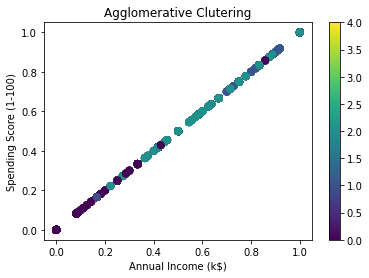

In [18]:
#3. Plot the clusters. 

fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['PURCHASES_INSTALLMENTS_FREQUENCY'] , df ["PURCHASES_INSTALLMENTS_FREQUENCY"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

In [19]:
#4.Plot the dendrogram. Use k-means clustering. 
from sklearn.cluster import KMeans

#try using 5 clusters 

kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,1
2,4
3,1
4,1
...,...
8944,0
8945,3
8946,3
8947,1


In [20]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[0.00976546 0.91111423 0.03744281 0.01986779 0.0456528  0.00115034
  0.8730144  0.21765069 0.79413963 0.00687177 0.00213044 0.07309508
  0.14894594 0.03756107 0.00256978 0.81975039 0.88875832]
 [0.11457504 0.96839318 0.00557655 0.00550733 0.00218457 0.03386035
  0.13116655 0.08110718 0.050091   0.15147908 0.04396922 0.00708041
  0.13851456 0.02913699 0.01344547 0.02371891 0.91538605]
 [0.00899842 0.37577709 0.0068606  0.00602203 0.00405469 0.01168438
  0.18747418 0.07618633 0.10577107 0.03549639 0.00956316 0.00871614
  0.12870079 0.02778588 0.00372422 0.21071709 0.88807681]
 [0.08353557 0.92946766 0.0243585  0.00925981 0.0363371  0.01499857
  0.88062419 0.13043976 0.82997932 0.06463409 0.02001568 0.06524995
  0.13625649 0.03126311 0.01584272 0.05697372 0.93477926]
 [0.10548224 0.97475505 0.05929733 0.05584052 0.02807937 0.01480197
  0.88302103 0.81179586 0.40794681 0.06468748 0.01910467 0.10821497
  0.21913302 0.05846241 0.01030915 0.18900128 0.95794786]]


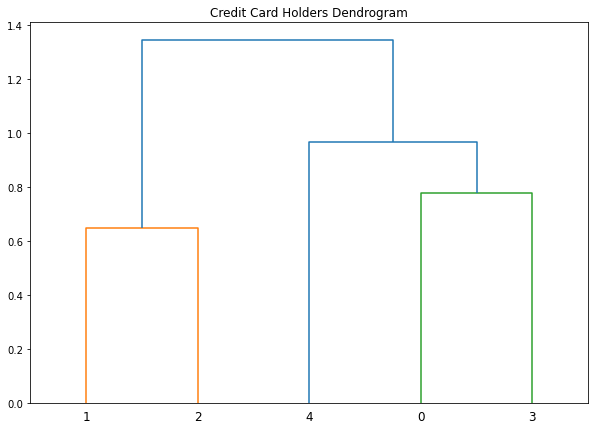

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

In [22]:
#5. Try different k values and select the best one. 
#try using 15 clusters 


kmeans=KMeans(n_clusters=15, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,11
1,11
2,4
3,0
4,11
...,...
8944,8
8945,8
8946,8
8947,13


In [23]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[9.12951033e-03 3.26197467e-01 5.74746905e-03 5.67400260e-03
  2.25196347e-03 1.24819358e-02 1.25692116e-01 6.30869644e-02
  5.94572274e-02 3.46902566e-02 9.19924268e-03 5.88505395e-03
  1.30040174e-01 2.86130341e-02 4.24855372e-03 6.44241137e-02
  9.55707763e-01]
 [8.34806379e-02 9.83530759e-01 2.38522608e-02 6.61933226e-03
  3.99990078e-02 1.47097370e-02 9.55633096e-01 9.38287129e-02
  9.26352344e-01 5.76335812e-02 1.72519651e-02 7.04258328e-02
  1.31531806e-01 3.18448842e-02 1.84578680e-02 6.13490548e-02
  9.89626556e-01]
 [8.71542839e-02 9.60089745e-01 2.05564780e-02 2.25833758e-02
  3.92402983e-03 1.55800205e-02 4.02322656e-01 3.65277511e-01
  5.74888330e-02 8.21114114e-02 2.28649791e-02 2.75243031e-02
  1.41819843e-01 2.79984151e-02 1.04639555e-02 4.13874785e-02
  9.82788296e-01]
 [6.01591843e-03 9.51653677e-01 2.28207013e-02 3.84893939e-03
  4.28275054e-02 6.01285115e-04 9.22204948e-01 6.09232258e-02
  8.80412014e-01 3.24820430e-03 6.22869132e-04 5.57589205e-02
  1.34402584e-01

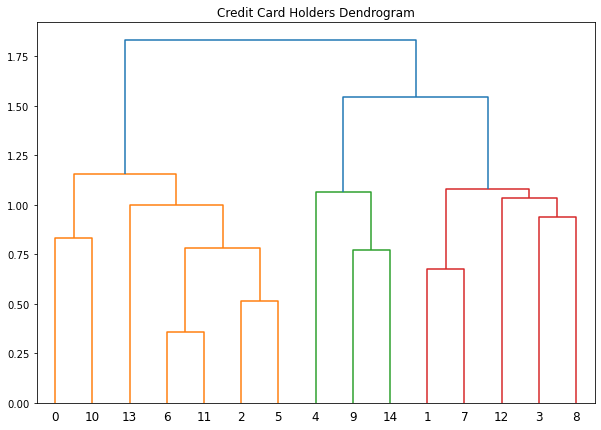

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

In [25]:
#try using 30 clusters 

kmeans=KMeans(n_clusters=30, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,10
2,0
3,21
4,1
...,...
8944,22
8945,12
8946,12
8947,27


In [26]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[9.33054733e-02 9.77207776e-01 2.99796928e-02 3.52879928e-02
  1.41371323e-03 1.21532896e-02 9.24202610e-01 9.16941212e-01
  3.58564896e-02 5.43400692e-02 1.39661978e-02 5.68858805e-02
  1.77494995e-01 3.58708947e-02 9.29384888e-03 6.65353568e-02
  9.86860304e-01]
 [6.40315885e-02 9.82323250e-01 7.90828517e-03 8.41796081e-03
  1.98968519e-03 6.73608481e-03 1.66451506e-01 1.21897151e-01
  4.41217824e-02 3.87438940e-02 9.08360935e-03 8.56093524e-03
  1.14635504e-01 1.63865301e-02 9.91516528e-03 1.54515648e-02
  9.90740741e-01]
 [7.00298228e-03 9.57782405e-01 2.02520283e-02 3.80174836e-03
  3.72677239e-02 5.65401014e-04 9.60370769e-01 5.91501932e-02
  9.26268390e-01 5.51346212e-03 1.01626016e-03 5.34852717e-02
  1.17702484e-01 2.09296233e-02 2.89962288e-03 4.46600189e-01
  9.75378788e-01]
 [4.47248422e-03 7.21710570e-01 1.50720367e-02 4.39537318e-03
  2.48873464e-02 1.28152261e-03 5.88038769e-01 6.44590407e-02
  5.03674792e-01 2.76520664e-03 5.88603171e-04 2.90957810e-02
  1.42847774e-01

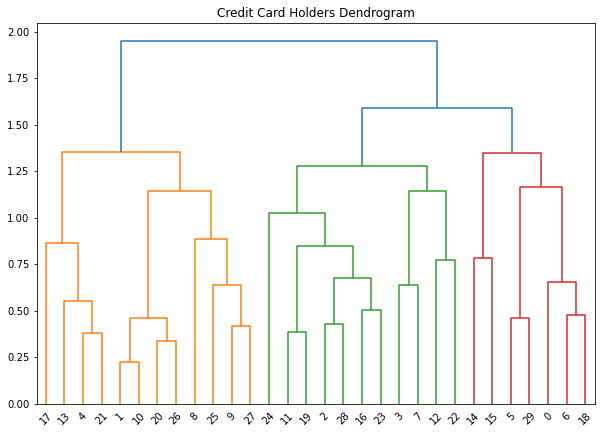

In [27]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))

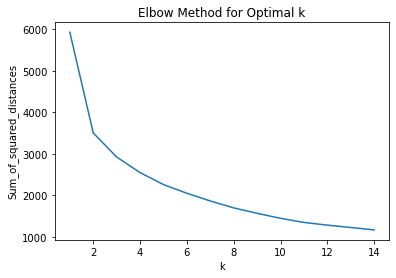

In [28]:
from sklearn.cluster import KMeans
#based on the elbow method, the best K-mean value is 2, which is why it is chosen. 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [29]:
kmeans=KMeans(n_clusters=2, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,1
3,0
4,0
...,...
8944,1
8945,1
8946,1
8947,0


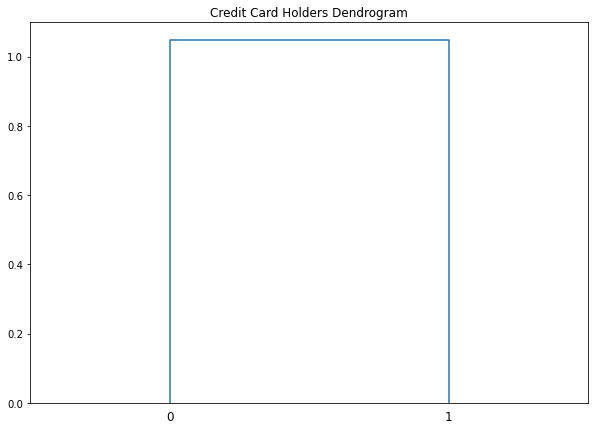

In [30]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Card Holders Dendrogram")
dend=shc.dendrogram(shc.linkage(kmeans.cluster_centers_, method="complete"))